# Visualizing the data

This section contains the code necessary to visualize the processed transcription data; it is divided into two parts:

1. Create simple bar graphs,
2. Create grouped bar graph.

First, we run the definitions step

In [1]:
%run 02_definitions.ipynb

And load the cached data from the previous step:

In [2]:
transcriptions = read_cache("transcriptions_lemmas").to_dict("records")
speech_list = read_cache("anthony_speech_lemmas").to_dict("records")

## Create simple bar graphs
This code will create one bar graph for each dataset depicting five most frequent words from that dataset. The four graphs will be displayed in a 2x2 grid.

### Import modules

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from collections import Counter

### Plot data in bar graphs

Generate a 2-by-2 grid of bar graphs, save the data to .csv, and display the result.

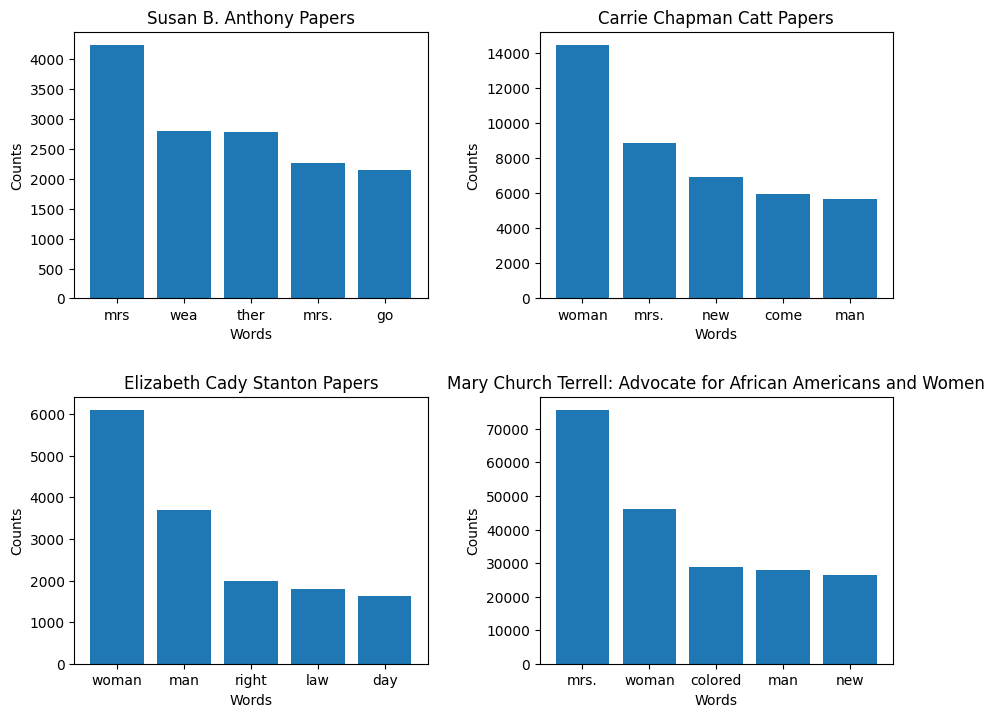

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.tight_layout(pad=5.0)
word_count_rows = []

#This code will loop over the lemmas from each dataset.
for i, transcription in enumerate(transcriptions):
    title = transcription['title']
    text = transcription['text']
    word_counts = Counter(text)
    #Identify the top 5 words for each dataset.
    top_words = word_counts.most_common(5)
    words, counts = zip(*top_words)
    
    #Create a 2x2 grid of bar graphs.
    ax = axs[i // 2][i % 2]
    ax.bar(words, counts)
    ax.set_title(title)
    ax.set_xlabel('Words')
    ax.set_ylabel('Counts')

    # Keep track of the counts for .csv
    for word, count in top_words:
        word_count_rows.append({"Dataset": title, "Word": word, "Count": count})

# Write the counts to .csv
word_counts_df = pd.DataFrame(word_count_rows)
word_counts_df.to_csv("outputs/word_counts.csv")

plt.show()

*A graphic with four bar charts showing the counts of the top five most frequent words within four different collections*

[Download the word count data as a .csv file](https://github.com/LibraryOfCongress/btp-data/raw/main/outputs/word_counts.csv)

## Create grouped bar graph
This code will create a grouped bar graph showing the usage of the five most frequent words from Susan B. Anthony's speeches by year.

### Group speeches by year

In [5]:
# some years have multiple speeches
year_speeches = {}
for speech in speech_list:
    year = speech["year"]
    if year not in year_speeches:
        year_speeches[year] = []
    year_speeches[year].append(speech)

### Count word occurences for each year, excluding "nan" values

In [6]:
# nan means "not a number." This will exclude cases where there are no speeches for a given year.
year_word_counts = {}
for year, speeches in year_speeches.items():
    word_counts = Counter()
    for speech in speeches:
        words = [word for word in speech["text"] if word != "nan"]
        word_counts.update(words)
    year_word_counts[year] = word_counts

Write the word counts to .csv file

In [7]:
year_word_count_rows = []
for year, count in year_word_counts.items():
    year_word_count_rows.append({"Year": year, "Count": count})
year_word_count_rows = sorted(year_word_count_rows, key=lambda row: -row["Count"])
year_word_count_df = pd.DataFrame(year_word_count_rows)
year_word_count_df.to_csv("outputs/year_word_counts.csv")

### Sum word occurences across all years

In [8]:
word_counts = Counter()
for year_counts in year_word_counts.values():
    word_counts += year_counts

### Get and print five most frequent words with most occurences

In [9]:
top_words = [word for word, count in word_counts.most_common(5)]
print(top_words)

['man', 'woman', 'law', 'shall', 'slave']


### Create grouped bar graph

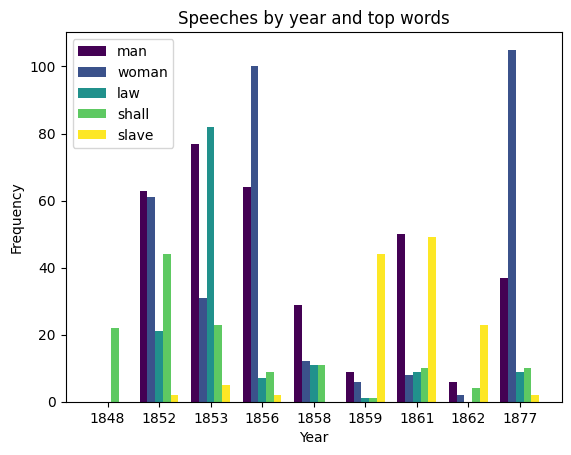

In [11]:
data = []
cmap = mpl.colormaps['viridis'] # Use an accessible color palette
for i, word in enumerate(top_words):
    word_data = []
    for year, word_counts in year_word_counts.items():
        count = word_counts.get(word, 0)
        word_data.append(count)
    data.append(word_data)

bar_width = 0.15
year_labels = list(year_word_counts.keys())
x = np.arange(len(year_labels))
fig, ax = plt.subplots()
count = len(data)
colors = [cmap(float(i)/float(count-1)) for i in range(count)]
for i, word_data in enumerate(data):
    ax.bar(x - (2 - i) * bar_width, word_data, bar_width, label=top_words[i], color=colors[i])


# Set the x-axis tick locations and labels
ax.set_xticks(range(len(year_labels)))
ax.set_xticklabels([int(year) for year in year_labels])

ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Frequency')
ax.set_title('Speeches by year and top words')

plt.show()

*A bar chart showing the frequencies of the top five words for each year between 1848 and 1877*

[Download the word count by year data as a .csv file](https://github.com/LibraryOfCongress/btp-data/raw/main/outputs/year_word_counts.csv)